<a href="https://colab.research.google.com/github/SusantaBanerjee/ML-College/blob/main/attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

In [ ]:
!pip install face-recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=f5e94628c4825d38163d42f79b02e7738d9d195153e847f304a6ebe67cf7abdd
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
face_1 = face_recognition.load_image_file("/content/drive/MyDrive/Elon/download (3).jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

# face_2 = face_recognition.load_image_file("Donald Trump.jpg")
# face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_2 = face_recognition.load_image_file("/content/drive/MyDrive/Elon/download (6).jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

known_face_encodings = [
  face_1_encoding,
  face_2_encoding
  ]
known_face_names = [
    "Elon Musk",
    "Donald Trump"
    
]
print("Done learning and creating profiles")

Done learning and creating profiles


In [ ]:
def makeAttendanceEntry(name):
    with open('/content/drive/MyDrive/Elon/attendance_list.csv','r+') as f:
        allLines = f.readlines()
        attendanceList = []
        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])
        if name not in attendanceList:
            now = datetime.now()
            dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

Elon Musk


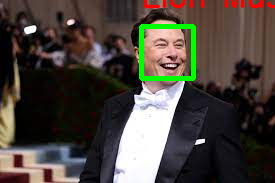

In [ ]:
 file_name = "/content/drive/MyDrive/Elon/download (8).jpg"

unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "unknow"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    makeAttendanceEntry(name)
      
    
    # display(pil_image)
cv2_imshow(unknown_image_to_draw)